Dataset Loaded Successfully!
   TransactionNo          Items          DateTime  Daypart  DayType
0              1          Bread   10/30/2016 9:58  Morning  Weekend
1              2   Scandinavian  10/30/2016 10:05  Morning  Weekend
2              2   Scandinavian  10/30/2016 10:05  Morning  Weekend
3              3  Hot chocolate  10/30/2016 10:07  Morning  Weekend
4              3            Jam  10/30/2016 10:07  Morning  Weekend

Sample Transaction: ['1', 'Bread', '10/30/2016 9:58', 'Morning', 'Weekend']

Frequent Itemsets:
    support     itemsets
0  0.564149  (Afternoon)
1  0.017994  (Alfajores)
2  0.162140      (Bread)
3  0.018481    (Brownie)
4  0.049983       (Cake)

Top 10 Rules:
       antecedents  consequents   support  confidence      lift
0      (Alfajores)  (Afternoon)  0.011947    0.663957  1.176918
1          (Bread)  (Afternoon)  0.080997    0.499549  0.885491
2        (Brownie)  (Afternoon)  0.012142    0.656992  1.164572
3           (Cake)  (Afternoon)  0.035646    

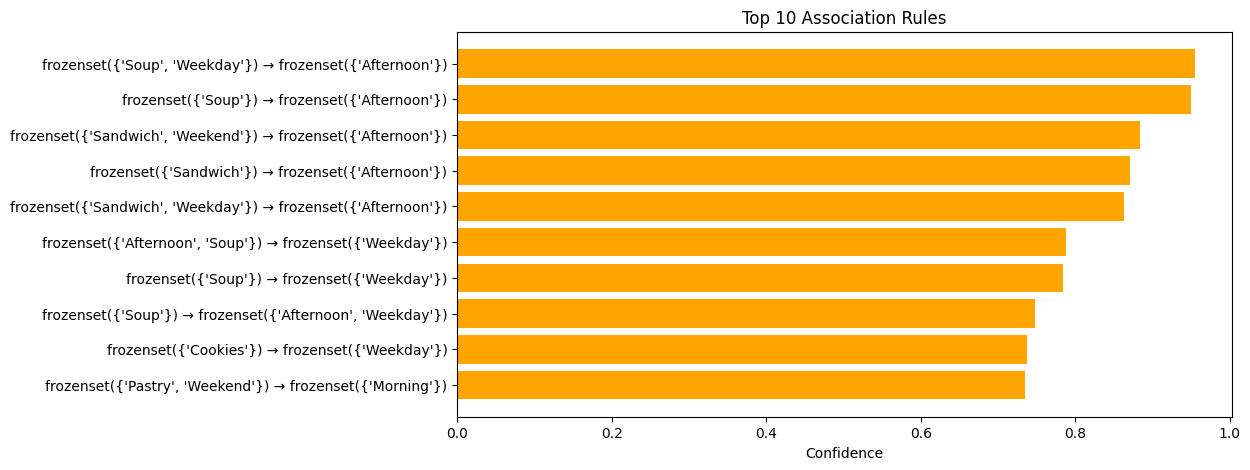

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# ----------------------------------------
# STEP 1: Load Dataset
# ----------------------------------------
df = pd.read_csv("Order3.csv")
print("Dataset Loaded Successfully!")
print(df.head())

# ----------------------------------------
# STEP 2: Data Pre-processing
# Convert each row into a transaction (list of items)
# ----------------------------------------
transactions = df.apply(lambda row: row.dropna().astype(str).tolist(), axis=1).tolist()

print("\nSample Transaction:", transactions[0])

# ----------------------------------------
# STEP 3: One-Hot Encoding
# ----------------------------------------
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_array, columns=te.columns_)

# ----------------------------------------
# STEP 4: Apply Apriori Algorithm
# ----------------------------------------
frequent_items = apriori(basket, min_support=0.01, use_colnames=True)
print("\nFrequent Itemsets:")
print(frequent_items.head())

# ----------------------------------------
# STEP 5: Generate Association Rules
# ----------------------------------------
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.2)
print("\nTop 10 Rules:")
print(rules[['antecedents','consequents','support','confidence','lift']].head(10))

# ----------------------------------------
# STEP 6: Visualization of Rules
# ----------------------------------------
top10 = rules.sort_values(by="confidence", ascending=False).head(10)
top10['rule'] = top10['antecedents'].astype(str) + " → " + top10['consequents'].astype(str)

plt.figure(figsize=(10,5))
plt.barh(top10['rule'], top10['confidence'], color='orange')
plt.xlabel("Confidence")
plt.title("Top 10 Association Rules")
plt.gca().invert_yaxis()
plt.show()
